#  Atividade prática aula 04 <h1>
    Aluno: Kristtopher Kayo Coelho
    Matrícula: ES95031

A atividade consiste em desenvolver exemplos (enunciados e resoluções) que expliquem cada uma das distribuições apresentadas no conjunto de slides da aula quatro. A seção I corresponde à importação das bibliotecas necessária e a implementação das funções de apresentação gráfica. As seções seguintes descreves as principais distribuições consideradas neste trabalho.

## <span style="color: blue">I - Bibliotecas e funções de exibição dos gráficos.</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
from scipy.stats import binom
import seaborn as sns

Implementação das funções de apresentação gáfica:

In [2]:
def cdf(np_amostra, xlabel=r'x', ylabel=r'$F(X \leq x)$'):

    x = np.sort(np_amostra)
    ecdf = sm.distributions.ECDF(np_amostra)
    y = ecdf(x)
    plt.step(x, y, where='post')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(min(x) - 0.05, max(x) + 0.05)
    plt.ylim(0 - 0.01, 1 + 0.01)
    plt.title('CDF')

def pmf(amostra_discreta, xlabel=r'x', ylabel=r'$p(X = x)$'):
    df_amostra = pd.DataFrame({'': amostra_discreta})
    ax = df_amostra.plot(kind='hist', density=True, histtype='bar', rwidth=0.1,
                         xlim=(min(amostra_discreta) - 0.05, max(amostra_discreta) + 0.05), ylim=(0, 1),
                         legend=False, bins=np.arange(len(amostra_discreta)) - 0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title('PMF')


def pdf (amostra_continua, xlabel=r'$Tempo~x$', ylabel=r'$f(X)$'):
    df_amostra = pd.DataFrame({'': amostra_continua})
    ax = df_amostra.plot(kind='hist', density=True, histtype='bar', rwidth=1,
                         xlim=(min(amostra_continua) - 0.05, max(amostra_continua) + 0.05), ylim=(0, 1),
                         legend=False, bins=np.arange(len(amostra_continua)) - 0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    lim_min = int(round(min(amostra_continua)))
    if lim_min >= 0:
        lim_min = 0
    else:
        ax.axvline(0, color='black', lw=1, linestyle=':')
    ax.set_xticks(range(lim_min, int(round(max(amostra_continua)))))
    plt.title('PDF')

## <span style="color: blue">II - Bernoulli.</span>
O resultado de exames médicos para detecção de corona vírus em 100 pessoas:

#### Fórmula da CDF
$$F(x) = 
\begin{cases}0 & x<0\\
             1-p & 0 \leq x < 1\\
             1, & x \geq 1
             \end{cases}
$$

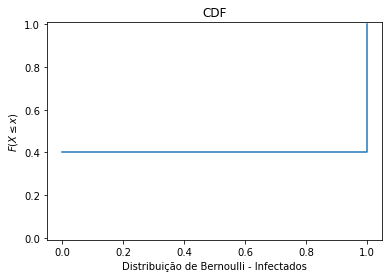

In [3]:
amostras = np.random.randint(0,2,10)
cdf(amostras, xlabel= 'Distribuição de Bernoulli - Infectados')

#### Fórmula da PMF
$$p(x) =
\begin{cases}1-p = q, & X = 0\\
             p, & X = 1
             \end{cases}
$$
$$0 \leq p \leq 1$$

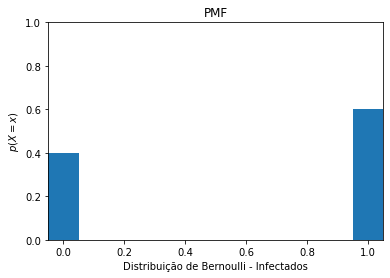

In [4]:
pmf(amostras, xlabel= 'Distribuição de Bernoulli - Infectados')

## <span style="color: blue">III - Binomial.</span>

Considerando pacientes do grupo sanguineo tipo A com maior propensão a agravar a crise respiratória por corona virus.
Suponha que foi constatado que a probabilidade de ter sangue tipo A é 0,4. 
Para 4 exames aleatórios e seja X o número com o tipo sanguíneo A:
A representação da distribuição Binomial foi realizada com auxilio da função pronta "binom.pmf", a qual já apresenta a Função Massa de Probabilidade.

#### Fórmula da PMF

\begin{equation*}
p(x) = {n \choose x} p^x (1-p)^{ n-x}
\end{equation*}
$$ x = 0,1,\ldots, n $$

<BarContainer object of 4 artists>

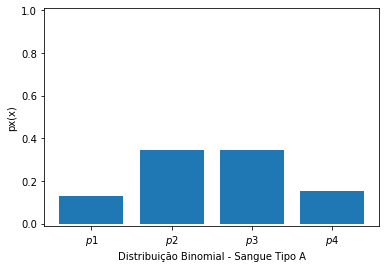

In [5]:
x = np.random.randint(0,4,4)  # valores de x =0,1,2,3 ou 4
# distribuição dos resultados com probabilidade de um experimento resultar em sucesso
p_x = binom.pmf(x, 4, 0.4)

plt.xlabel('Distribuição Binomial - Sangue Tipo A')
plt.ylabel('px(x)')
plt.ylim(0 - 0.01, 1 + 0.01)
plt.xticks([0,1,2, 3],['$p1$','$p2$','$p3$','$p4$'])
plt.bar(x,p_x)

## <span style="color: blue">IV - Poisson.</span>
Probabilidade de pacientes chegando para atendimento em um pronto socorro.

#### Fórmula da CDF

\begin{equation*} F(x) = {\sum_{k=0}^\infty} {{\alpha^k e^{-\alpha}} \over k!}u(x-k)
\end{equation*}


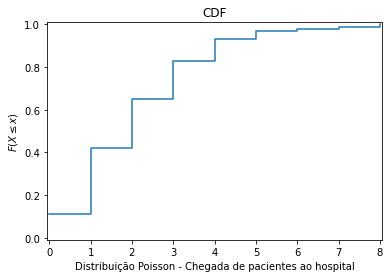

In [6]:
x = np.random.poisson(lam=2, size=100)
cdf(x, xlabel = 'Distribuição Poisson - Chegada de pacientes ao hospital')

#### Fórmula da PMF

\begin{eqnarray*}
p(x) = {\alpha^x \over x!}{e^{-\alpha}}\\
x = 0,1,\ldots \textrm{ e } \alpha > 0
\end{eqnarray*}

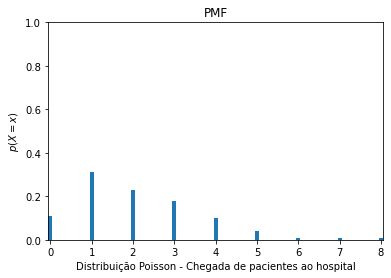

In [7]:
pmf(x, xlabel = 'Distribuição Poisson - Chegada de pacientes ao hospital')

## <span style="color: blue">V - Geométrica.</span>
Distribuição geométrica para 100 pacientes, com a probabilidade de um sucesso individual para atendimento igual a 0,25:

#### Fórmula da CDF
\begin{equation*} F(x) = {\sum_{k=0}^\infty} {p(1-p)^ku(x-k)}
\end{equation*}

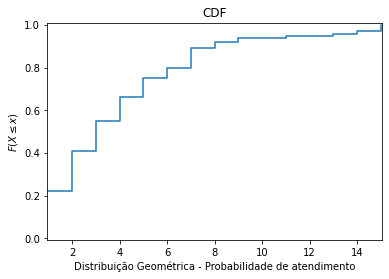

In [8]:
x = np.random.geometric(p=0.25, size=100)
cdf(x, xlabel = 'Distribuição Geométrica - Probabilidade de atendimento')

#### Fórmula da PMF

$$
p(x) = p (1 - p)^x
$$
$$
x = 0,1,2, \ldots
$$

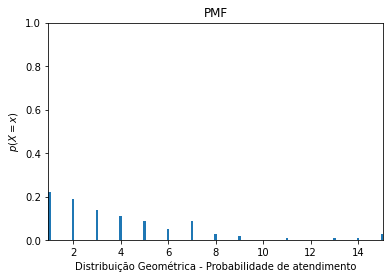

In [9]:
pmf(x, xlabel = 'Distribuição Geométrica - Probabilidade de atendimento')

## <span style="color: blue">VI - Uniforme.</span>
A distribuição uniforme é um número finito de resultados com chances iguais de acontecer. Portanto representa a probabilidade de cada paciente (10) ser atendido. A população é 100.

#### Fórmula da CDF
$$F(x)
\begin{cases}0, & x < a \\
             {x - a \over b - a}, & a \leq x \leq b\\
             1, & x>b
             \end{cases}
$$

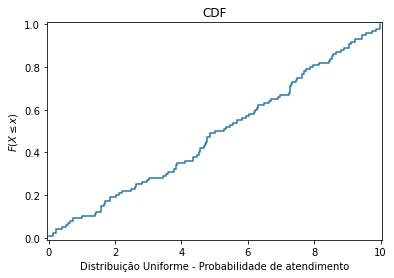

In [10]:
x = np.random.uniform(0.0, 10.0, 100)
cdf(x, xlabel = 'Distribuição Uniforme - Probabilidade de atendimento')

#### Fórmula da PDF
$$f(x)
\begin{cases}1 \over b - a, & a \leq x \leq b\\
             0, & \textrm{caso contrário}
             \end{cases}
$$

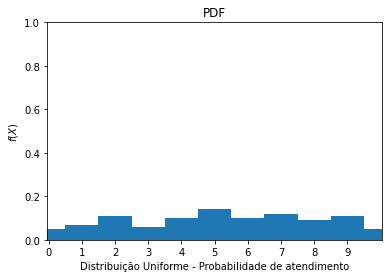

In [11]:
pdf(x, xlabel = 'Distribuição Uniforme - Probabilidade de atendimento')

## <span style="color: blue">VII - Exponencial.</span>
A distribuição exponencial representa a possibilidade de um paciente ser atendido até 5 horas de espera.

#### Fórmula da CDF
$$F(x)\begin{cases}= 1- e^{-\lambda x}, & x\geq 0, \lambda>0\\
0, & \textrm{caso contrário}
             \end{cases} $$

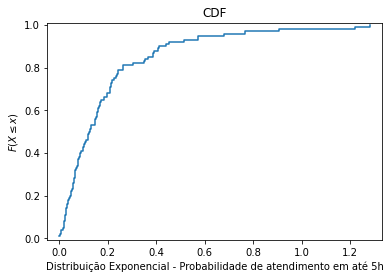

In [12]:
x = np.random.exponential(1/5, 100)
cdf(x, xlabel = 'Distribuição Exponencial - Probabilidade de atendimento em até 5h')

#### Fórmula da PDF
$$f(x) = 
\begin{cases}\lambda e ^{-\lambda x}, & x\geq 0 \textrm{ e } \lambda>0\\
0, & \textrm{caso contrário}
             \end{cases}
$$

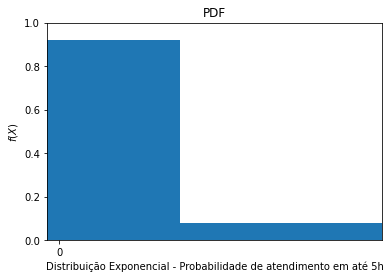

In [13]:
pdf(x, xlabel = 'Distribuição Exponencial - Probabilidade de atendimento em até 5h')

## <span style="color: blue">VIII - Gaussiana (Normal).</span>
Caso a curva de contagio e consequentemente atendimento para pacientes com corona vírus tivesse um comportamento normal, ela poderia ser representadas através de uma distribuição Gausiana. Os gráficos a seguir representam o comportamento dos dados apresentados por uma distribuição normal.

#### Fórmula da CDF
\begin{equation}f(x) =  {1\over \sqrt{2 \pi \sigma}}\int\limits_{-\infty}^{x} e^{-{{(y-\mu)^2}\over 2 \sigma^2}}\textrm{dy}
\end{equation}

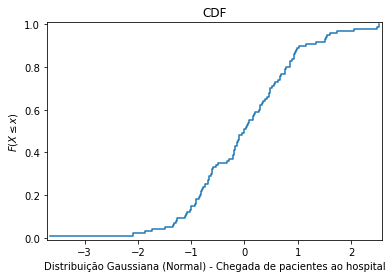

In [16]:
x = np.random.normal(size=100)
cdf(x, xlabel = 'Distribuição Gaussiana (Normal) - Chegada de pacientes ao hospital')

#### Fórmula da PDF
\begin{equation*}f(x) = {1\over \sqrt{2 \pi \sigma}}e^{-{{(x-\mu)^2}\over 2 \sigma^2}}
             \end{equation*}

(-0.01, 1.01)

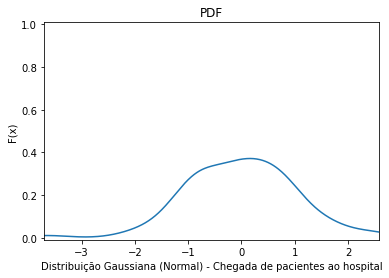

In [17]:
ser = pd.Series(x)
ser.plot.kde()
plt.xlim(min(x) - 0.05, max(x) + 0.05)
plt.xlabel('Distribuição Gaussiana (Normal) - Chegada de pacientes ao hospital')
plt.title('PDF')
plt.ylabel('F(x)')
plt.ylim(0 - 0.01, 1 + 0.01)